In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('teams_matches_stats-2.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.sort_values(by = 'date', ignore_index = 'True', inplace = True)
y = np.array(list(map((lambda i: 1 if i == 'W' else 0), df['result'])))
data = df.drop([ 'Opp Formation', 'Formation', 'Captain', 'Referee','result','time','game', 'day', 'season','GT', 'Gdiff'], axis = 1)

In [3]:
data.head()

,Attendance,Performance.3,Standard.5,Poss,Standard.4,Standard.3,offside,crosses,fouls_drw,fouls_com,...,sec_yel,red,yellow,Standard.8,GA,GF,date,team,venue,opponent
0,31342,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,2,0,1,1,2017-07-26,Nice,Home,Ajax
1,21337,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,3,0,1,2,2017-07-27,Bordeaux,Home,Videoton
2,32124,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,1,2017-07-27,Everton,Home,Ružomberok
3,14000,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,1,0,0,1,2017-07-27,Freiburg,Home,NK Domžale
4,26783,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,1,0,1,1,2017-07-27,Athletic Club,Away,Dinamo


In [17]:
num_cols = data.dtypes[(data.dtypes == 'int64') | (data.dtypes == 'float64')].index.tolist()
cat_cols = data.dtypes[data.dtypes == 'object'].index.tolist()

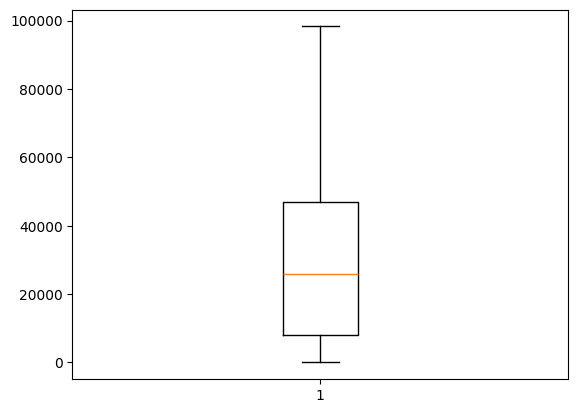

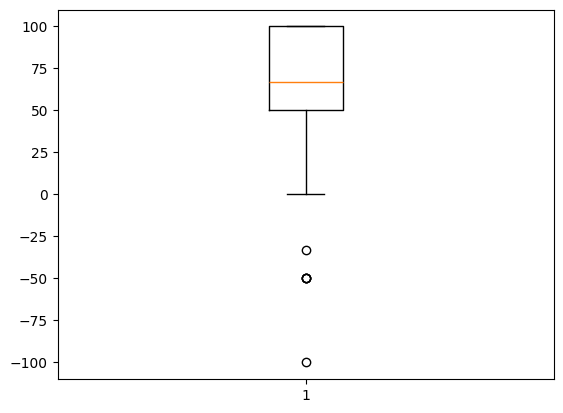

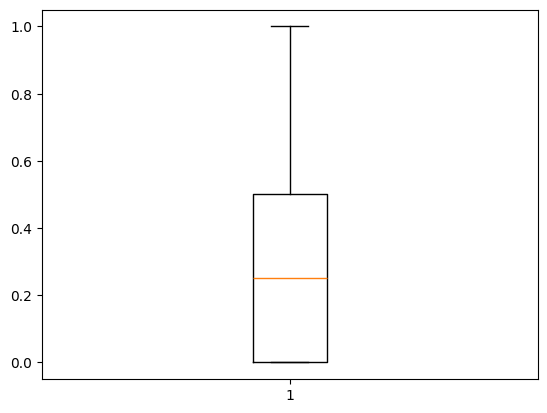

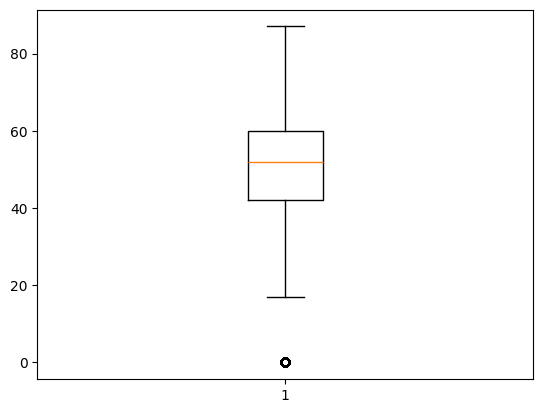

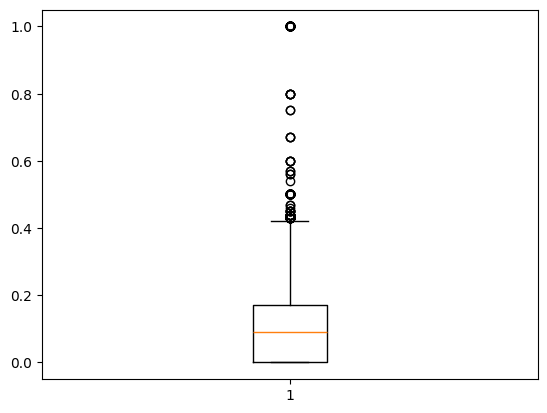

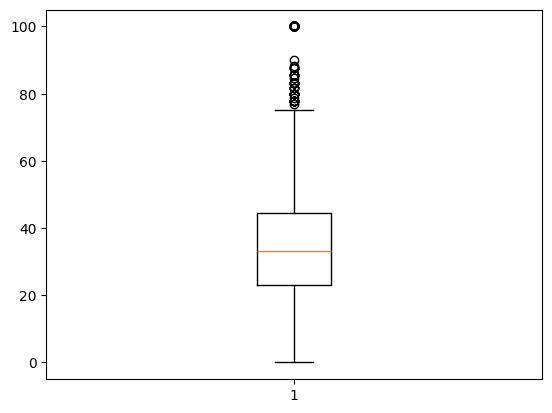

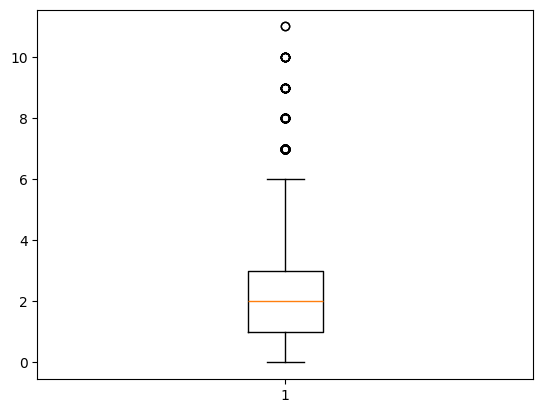

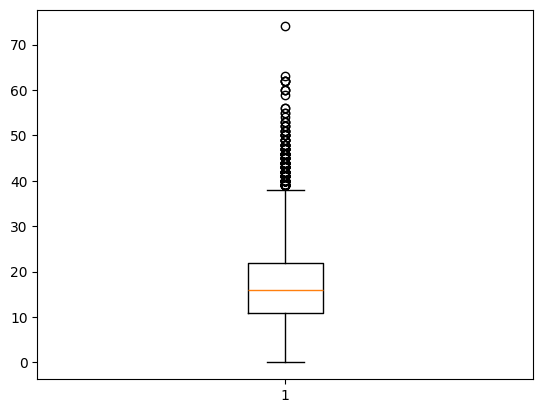

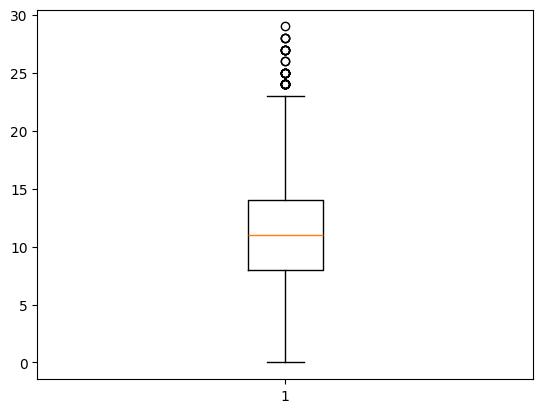

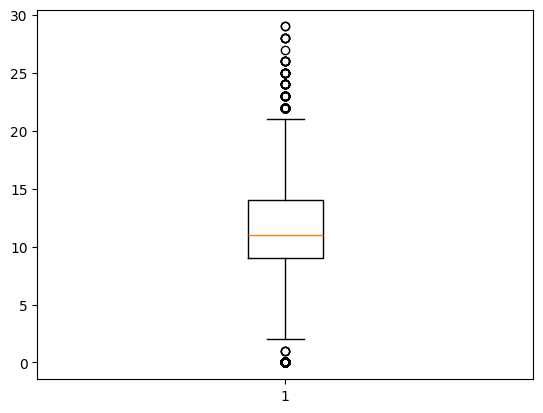

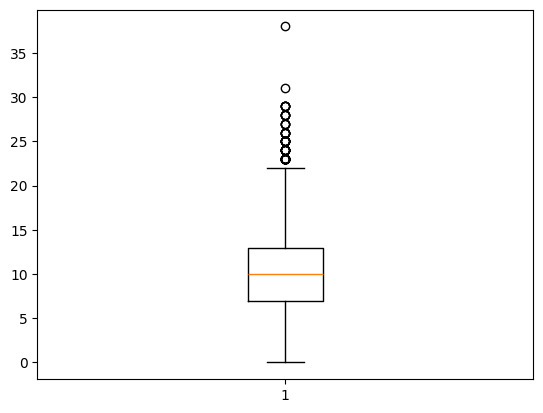

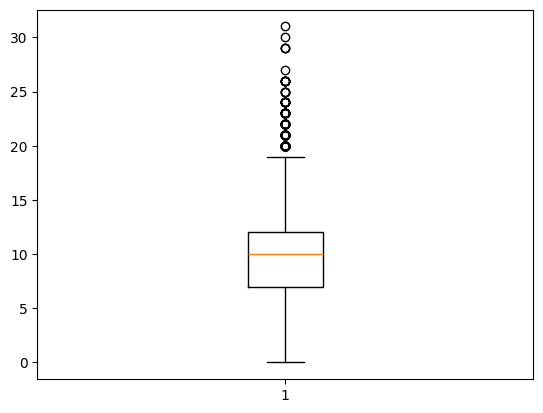

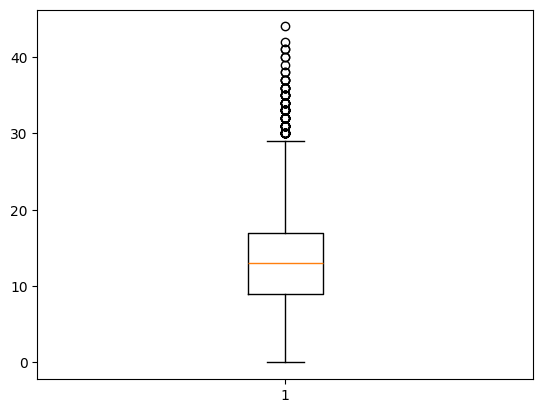

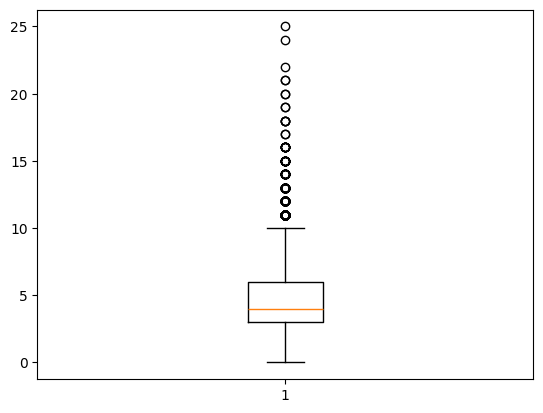

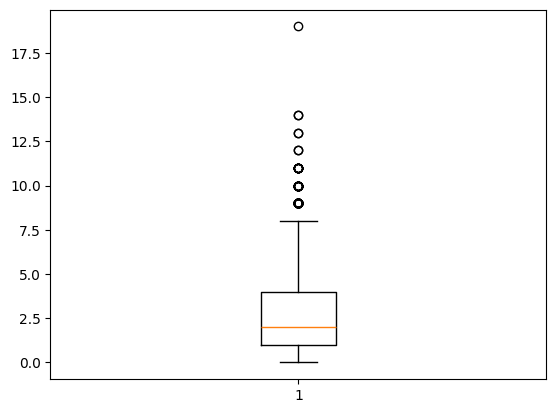

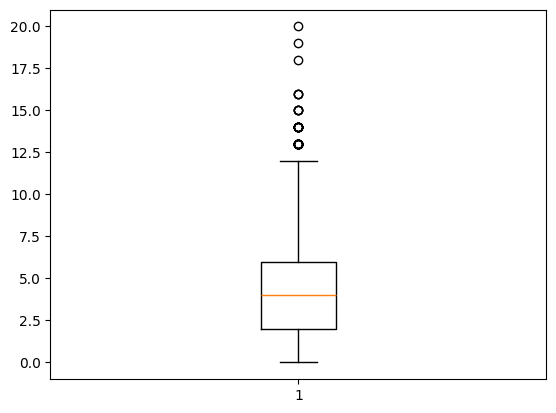

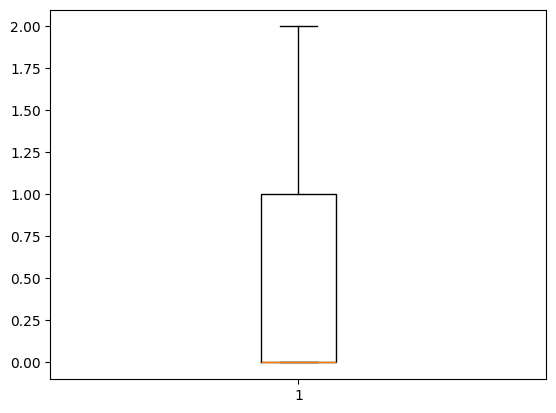

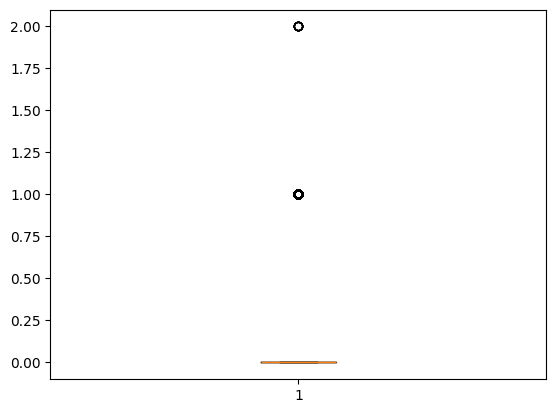

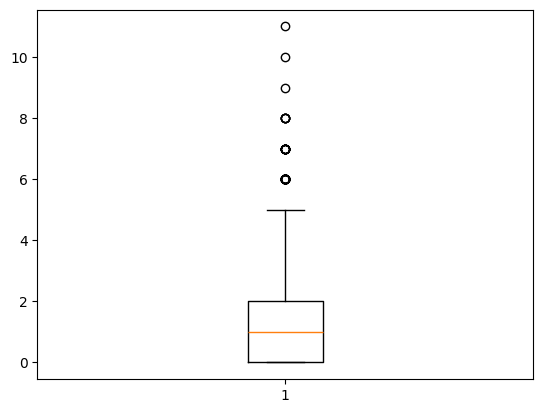

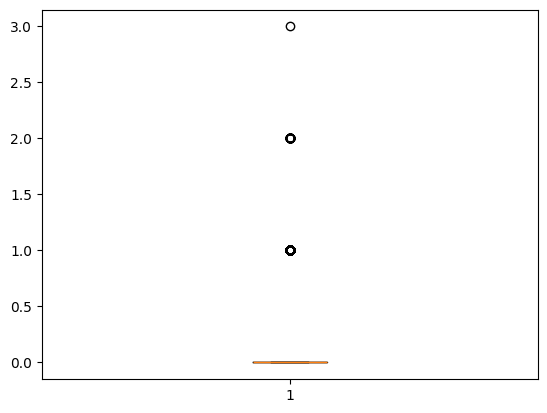

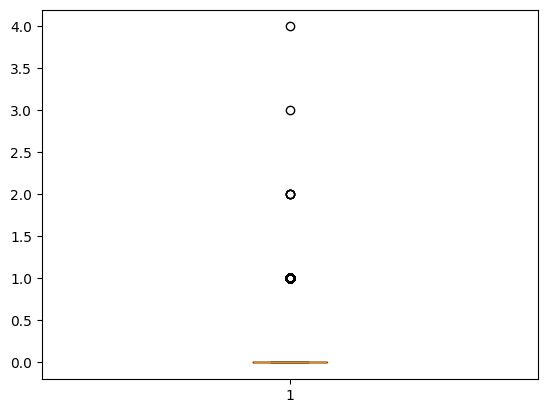

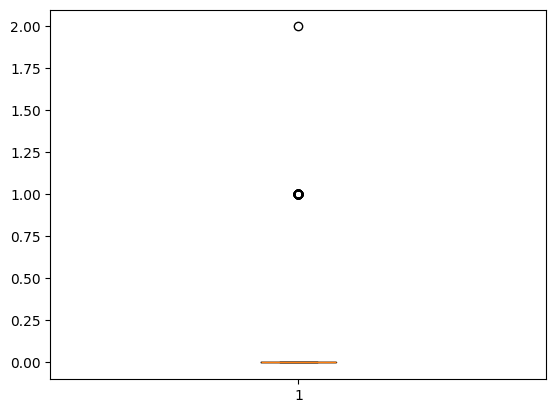

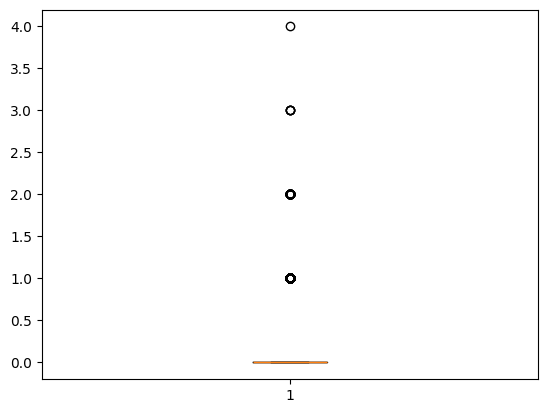

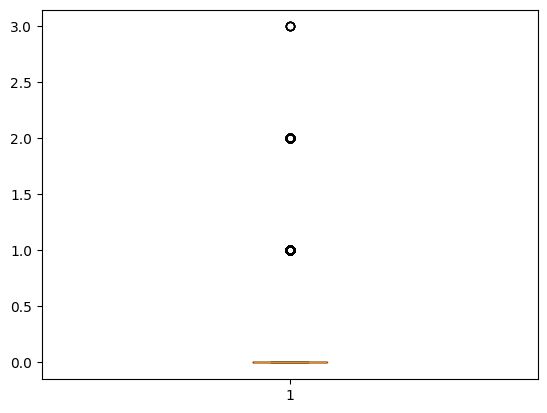

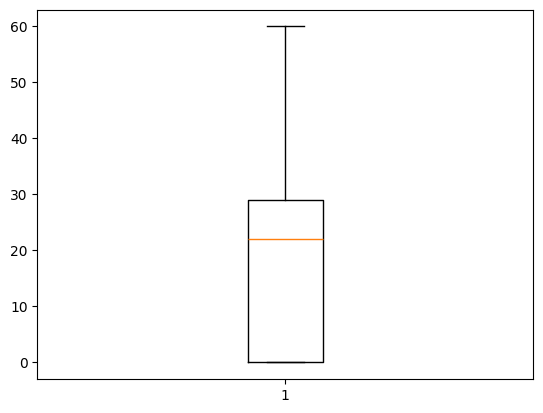

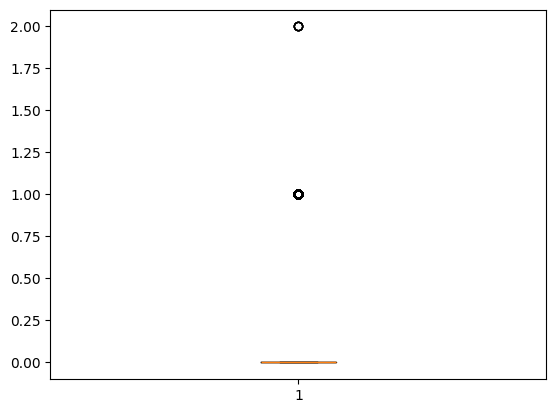

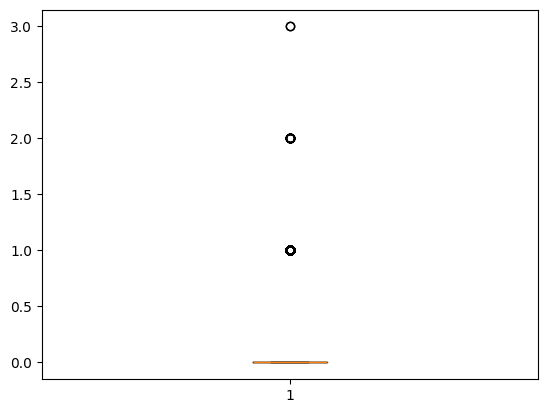

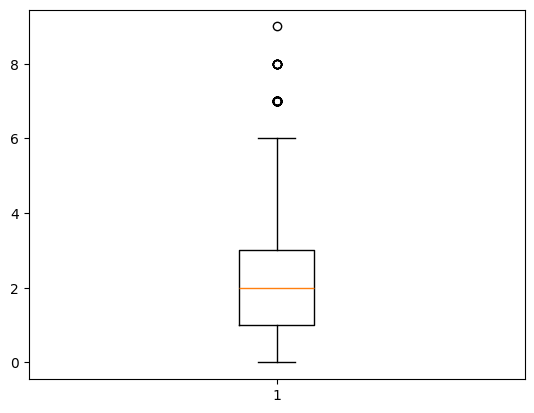

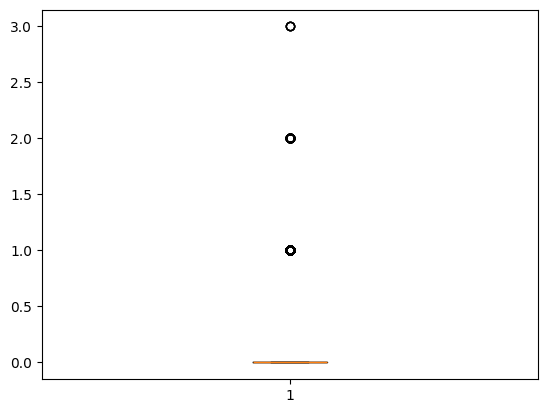

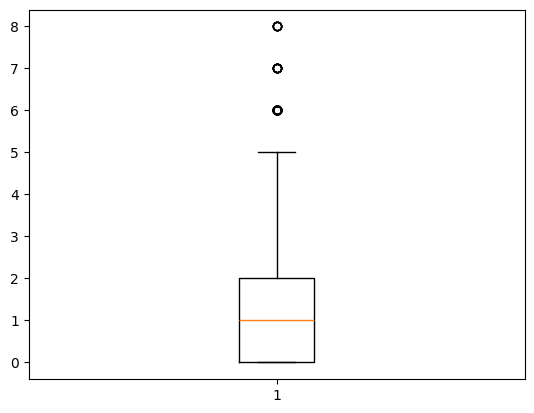

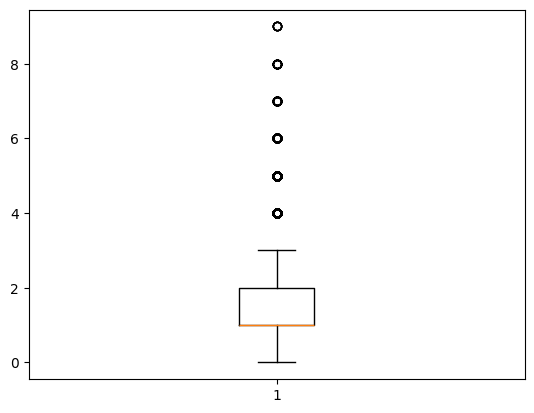

In [20]:
for col in num_cols:
    plt.boxplot(data[col].values)
    plt.show()

## Определение выбросов через IQR

In [33]:
def get_outliers_iqr(x, col):

    med, q_25, q_75 = data[col].describe()['50%'], data[col].describe()['25%'], data[col].describe()['75%']
    low_bound, high_bound = med - 3 * q_25, med + 3 + q_75
    out = 1 if low_bound <= x <= high_bound else 0

    return out

In [37]:
for col in num_cols:
    data[f'{col}_iqr'] = data[col].apply(lambda x: get_outliers_iqr(x, col))

In [38]:
data.head()

,Attendance,Performance.3,Standard.5,Poss,Standard.4,Standard.3,offside,crosses,fouls_drw,fouls_com,...,Penalty Kicks.3_iqr,Penalty Kicks_iqr,Standard.9_iqr,Tkl+Int_iqr,sec_yel_iqr,red_iqr,yellow_iqr,Standard.8_iqr,GA_iqr,GF_iqr
0,31342,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
1,21337,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
2,32124,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,1,1,1,0,1,1,1,1,0,1
3,14000,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,1,1,1,0,1,1,1,1,0,1
4,26783,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1


## Определение выбросов через LOF

In [50]:
from sklearn.neighbors import LocalOutlierFactor

In [90]:
for col in num_cols:
    lcf = LocalOutlierFactor()
    preds = lcf.fit_predict(data[[col]])
    data[f'{col}_lof'] = [0 if x <= -1 else 1 for x in preds]

/Users/rehamrin/Desktop/ML HW/ML_HW4/myenv/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/Users/rehamrin/Desktop/ML HW/ML_HW4/myenv/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/Users/rehamrin/Desktop/ML HW/ML_HW4/myenv/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/Users/rehamrin/Desktop/ML HW/ML_HW4/myenv/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
/Users/rehamrin/Desktop/ML H

## Чистка выбросов через удаление

In [73]:
data_iqr = data[pd.Series(data.columns)[pd.Series(data.columns).str.endswith('iqr')].values].copy()

In [82]:
(data_iqr.sum(axis=1) / data_iqr.shape[1]).value_counts(normalize=True) * 100

0.967742    23.817342
0.903226    18.984094
0.935484    18.881478
0.870968    17.301180
1.000000    12.714212
0.838710     6.977937
0.806452     1.272447
0.774194     0.051308
Name: proportion, dtype: float64

In [87]:
data_iqr['iqr'] = data_iqr.sum(axis=1) / data_iqr.shape[1]
data_iqr[data_iqr['iqr'] == 1].shape[0] / data_iqr.shape[0]

0.1271421241662391

In [91]:
data_lof = data[pd.Series(data.columns)[pd.Series(data.columns).str.endswith('lof')].values].copy()

In [92]:
(data_lof.sum(axis=1) / data_lof.shape[1]).value_counts(normalize=True) * 100

1.000000    83.919959
0.967742    13.945613
0.935484     1.682914
0.903226     0.369420
0.870968     0.051308
0.838710     0.030785
Name: proportion, dtype: float64

In [93]:
data_lof['lof'] = data_lof.sum(axis=1) / data_lof.shape[1]
data_lof[data_lof['lof'] == 1].shape[0] / data_lof.shape[0]

0.8391995895330939

## Чистка выбросов 

In [ ]:
from sklearn.pipeline import Pipeline, TransformerMixin
from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [370]:
def get_outliers_iqr(data, x, col):

    med, q_25, q_75 = data[col].describe()['50%'], data[col].describe()['25%'], data[col].describe()['75%']
    low_bound, high_bound = med - 3 * q_25, med + 3 + q_75
    out = 1 if low_bound <= x <= high_bound else 0

    return out

class OutliersIQRDeleter(TransformerMixin):
    def __init__(self, num_cols, **kwargs):

        self.kwargs = kwargs
        self.num_cols = num_cols

    def transform(self, X):
        X_iqr = X.copy()
        for col in tqdm(self.num_cols[:1]):
            X_iqr[f'{col}_iqr'] = X_iqr[col].apply(lambda x: get_outliers_iqr(X_iqr, x, col))
        iqr_cols = pd.Series(X_iqr.columns)[pd.Series(X_iqr.columns).str.endswith('iqr')].values
        X_iqr['iqr'] = X_iqr[iqr_cols].sum(axis=1) / X_iqr[iqr_cols].shape[1]

        self.del_index = X[X_iqr['iqr'] == 1].index

        return X[X_iqr['iqr'] == 1]

    def fit(self, *args, **kwargs):
        return self
    
    def transform_y(self, y):
        return y[self.del_index.tolist()]

In [373]:
class OutliersLOFDeleter(TransformerMixin):
    def __init__(self, num_cols, **kwargs):

        self.num_cols = num_cols
        self.kwargs = kwargs

    def transform(self, X):
        X_lof = X.copy()
        for col in tqdm(self.num_cols[:1]):
            lcf = LocalOutlierFactor()
            preds = lcf.fit_predict(X_lof[[col]])
            X_lof[f'{col}_lof'] = [0 if x <= -1 else 1 for x in preds]
        lof_cols = pd.Series(X_lof.columns)[pd.Series(X_lof.columns).str.endswith('lof')].values
        X_lof['lof'] = X_lof[lof_cols].sum(axis=1) / X_lof[lof_cols].shape[1]

        self.del_index = X[X_lof['lof'] == 1].index

        return X[X_lof['lof'] == 1]

    def fit(self, *args, **kwargs):
        return self
    
    def transform_y(self, y):
        return y[self.del_index.tolist()]

In [376]:
class OutliersIQRCorrector(TransformerMixin):
    def __init__(self, num_cols, **kwargs):

        self.num_cols = num_cols
        self.kwargs = kwargs

    def transform(self, X):
        X_iqr = X.copy()
        for col in self.num_cols[:1]:
            X_iqr[col] = self.get_outliers_corrector_iqr(X_iqr, col)

        return X_iqr

    def fit(self, *args, **kwargs):
        return self
    
    def get_outliers_corrector_iqr(self, X, col):

        med, q_25, q_75 = X[col].describe()['50%'], X[col].describe()['25%'], X[col].describe()['75%']
        low_bound, high_bound = med - 3 * q_25, med + 3 + q_75
        corrections = X[col].apply(
            lambda x: low_bound if x < low_bound else x if low_bound <= x <= high_bound else high_bound
            )

        return corrections

In [379]:
class OutliersLOFCorrector(TransformerMixin):
    def __init__(self, num_cols, **kwargs):

        self.num_cols = num_cols
        self.kwargs = kwargs

    def transform(self, X):
        X_lof = X.copy()
        for col in self.num_cols[:1]:
            X_lof[col] = self.get_outliers_corrector_lof(X_lof, col)

        return X_lof

    def fit(self, *args, **kwargs):
        return self

    def get_outliers_corrector_lof(self, X, col):

        lcf = LocalOutlierFactor()
        preds = lcf.fit_predict(X[[col]])
        cur_X = X[[col]].copy()
        cur_X['lof'] = preds

        med, q_25, q_75 = cur_X[col].describe()['50%'], cur_X[col].describe()['25%'], cur_X[col].describe()['75%']
        low_bound, high_bound = med - 3 * q_25, med + 3 + q_75

        corrections = cur_X.apply(
            lambda x: low_bound if (x['lof'] == -1 and x[col] < low_bound) else\
                  med if (x['lof'] == -1 and low_bound <= x[col] <= high_bound) else\
                  high_bound if (x['lof'] == -1 and x[col] > low_bound) else x[col],
                  axis=1
            )

        return corrections

## Тестирование классов

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(data[num_cols], y, train_size=0.8)
xtrain, xtest = xtrain.reset_index(drop=True), xtest.reset_index(drop=True)

In [338]:
xtrain.shape, xtest.shape, np.array(ytrain).shape, np.array(ytest).shape

((7796, 31), (1949, 31), (7796,), (1949,))

In [371]:
deleter = OutliersIQRDeleter(num_cols)

X_transformed = deleter.fit_transform(xtrain)
y_transformed = deleter.transform_y(np.array(ytrain))

100%|██████████| 1/1 [00:11<00:00, 11.90s/it]


In [372]:
X_transformed.shape, y_transformed.shape

((7796, 31), (7796,))

In [374]:
deleter = OutliersLOFDeleter(num_cols)

X_transformed = deleter.fit_transform(xtrain)
y_transformed = deleter.transform_y(np.array(ytrain))

  0%|          | 0/1 [00:00<?, ?it/s]/Users/rehamrin/Desktop/ML HW/ML_HW4/myenv/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
100%|██████████| 1/1 [00:00<00:00, 29.91it/s]


In [375]:
X_transformed.shape, y_transformed.shape

((7181, 31), (7181,))

In [377]:
deleter = OutliersIQRCorrector(num_cols)

X_transformed = deleter.fit_transform(xtrain)

In [378]:
assert X_transformed.shape == xtrain.shape

In [380]:
deleter = OutliersLOFCorrector(num_cols)

X_transformed = deleter.fit_transform(xtrain)

/Users/rehamrin/Desktop/ML HW/ML_HW4/myenv/lib/python3.9/site-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [381]:
assert X_transformed.shape == xtrain.shape